# Day 4: Exercise 

This exercise covers more numpy functions and plotting with matplotlib.

Docs: https://matplotlib.org/3.1.1/api/pyplot_summary.html

## 1. Image plotting and manipulation

In [2]:
from scipy import misc
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mping

%matplotlib inline

(768, 1024, 3)

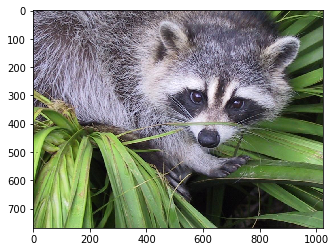

In [3]:
# get a random picture 
face = misc.face()
plt.imshow(face)
type(face)
face.shape

__optional: use your own picture!__
You can load it with:
`mping.imread("NAME OF THE IMAGE")`

### 1.1 Rotate a picture

Write a function which rotates a picture by a number of 90 degree angles (counter-clockwise). The function should check of the input angle is a multiple of 90. If not, print out a message!

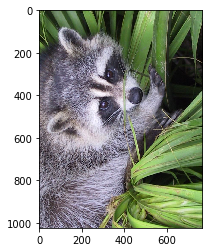

In [4]:
def rotate_pic(pic, angle):
    # YOUR CODE starts here!
    if angle % 90 == 0:
        for i in range(int(angle/90)):
            pic = np.rot90(pic)
        plt.imshow(pic)
    else:
        print("The angle is not a multiple of 90 degree.end=")
    return
    # YOUR CODE ENDS here!
rotate_pic(face, 90)

### 1.2 Mirror a picture

Write a function which mirrors a picture by the vertical or horizontal axis. Since there are only two possible axis, you can use a boolean to specify the angle.

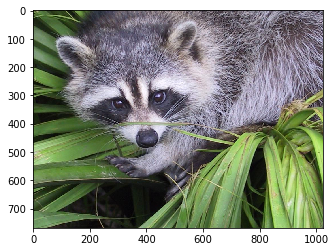

In [5]:
def mirror_pic(pic, vertical):
    # YOUR CODE starts here!
    if vertical == True:
        pic_v = pic[::-1,:,:]
        plt.imshow(pic_v)
    else:
        pic_h = pic[:,::-1,:]
        plt.imshow(pic_h)
    return
    # YOUR CODE ENDS here!
mirror_pic(face, False)

# 1.3 Make a picture black and white

Write a function which makes the image black and white. You can change a pixel to gray by assigning the mean to all three color channels. Example: (0,50,100) becomes (50,50,50)

In [6]:
print(face)

[[[121 112 131]
  [138 129 148]
  [153 144 165]
  ...
  [119 126  74]
  [131 136  82]
  [139 144  90]]

 [[ 89  82 100]
  [110 103 121]
  [130 122 143]
  ...
  [118 125  71]
  [134 141  87]
  [146 153  99]]

 [[ 73  66  84]
  [ 94  87 105]
  [115 108 126]
  ...
  [117 126  71]
  [133 142  87]
  [144 153  98]]

 ...

 [[ 87 106  76]
  [ 94 110  81]
  [107 124  92]
  ...
  [120 158  97]
  [119 157  96]
  [119 158  95]]

 [[ 85 101  72]
  [ 95 111  82]
  [112 127  96]
  ...
  [121 157  96]
  [120 156  94]
  [120 156  94]]

 [[ 85 101  74]
  [ 97 113  84]
  [111 126  97]
  ...
  [120 156  95]
  [119 155  93]
  [118 154  92]]]


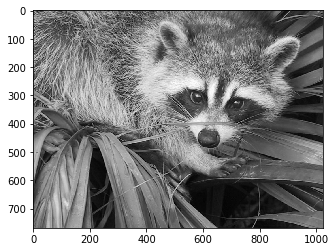

In [7]:
def black_n_white(pic):
    # YOUR CODE starts here!
    pic_grey = np.zeros(pic.shape)
    pic_grey[:,:,0] = (pic[:,:,0]/255+pic[:,:,1]/255+pic[:,:,2]/255)/3
    pic_grey[:,:,1] = (pic[:,:,0]/255+pic[:,:,1]/255+pic[:,:,2]/255)/3
    pic_grey[:,:,2] = (pic[:,:,0]/255+pic[:,:,1]/255+pic[:,:,2]/255)/3
    plt.imshow(pic_grey)
    return
    # YOUR CODE ENDS here!

def black_n_white2(pic):
    plt.imshow(np.stack([np.mean(pic,axis = 2)]*3,axis = 2) / 255)
    return
    
black_n_white(face)

### 1.4 Zoom into a picture

Write a function, which zooms into a given position (`x` and `y`), and cuts out a window of size `n` around that position. You should check that the x and y are withing the image, and also the window is within the image's borders. If not, print out a message.

Plot the picture.

Bonus: Draw a red square around the the zoomed part in the original picture, and plot both pics together. 



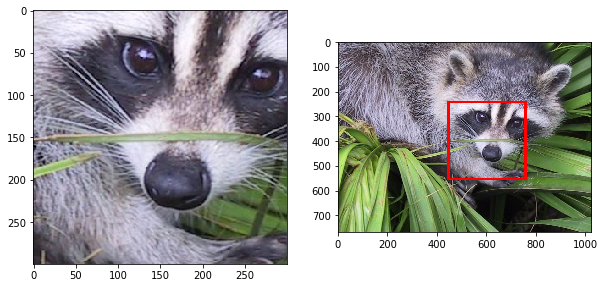

In [8]:
def zoom_pic(pic, x, y, n, d=10):
    # YOUR CODE starts here!
    r = pic.shape[0]
    c = pic.shape[1]
    if (x - n < 0) or (x + n > r) or (y - n < 0) or (y + n > c):
        print("Out of range")
    else:
        # we assume that x is axis=0 and y is axis=1
        zoom_in_pic = np.zeros((2*n,2*n,3))
        zoom_in_pic = pic[x-n:x+n,y-n:y+n,:]
        #plt.imshow(zoom_in_pic)
        whole_pic = np.zeros(pic.shape)
        whole_pic[:,:,0] = pic[:,:,0]/255
        whole_pic[:,:,1] = pic[:,:,1]/255
        whole_pic[:,:,2] = pic[:,:,2]/255
        whole_pic[x-n-d:x+n+d,y-n-d:y+n+d,:] = [1,0,0]
        whole_pic[x-n:x+n,y-n:y+n,:] = pic[x-n:x+n,y-n:y+n,:]/255
        #plt.imshow(whole_pic)
        
        fig,axes = plt.subplots(1,2,figsize = (10,10))
        axes[0].imshow(zoom_in_pic)
        axes[1].imshow(whole_pic)
        plt.show()
    # YOUR CODE ENDS here!
zoom_pic(face, 400, 600, 150)

### 1.5 Advanced: Make Checkerboard Filter

Write a function, which cuts the image into `n`x `m`  little pieces, and then arranges the pieces random into a new picture. The new picture should have the same size as the original pic.

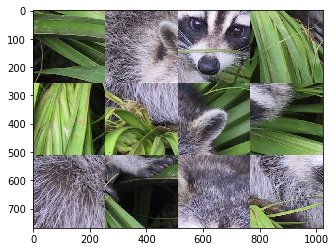

In [13]:
import random

# not complete!!!
def checker_filter(pic, n, m):
    # YOUR CODE Starts here!
    random_pic = np.zeros(pic.shape)
    
    r = pic.shape[0]
    c = pic.shape[1]
    er = int((r+1) / n)
    ec = int((c+1) / m)
    
    area = range(n*m)
    #start_position  = (i//m,i%m)
    for i in range(n*m):
        j = random.choice(area)
        area.remove(j)
        original_sp = np.array([j//m,j%m]) #original_pic_start_point
        random_sp = np.array([i//m,i%m]) #random_pic_start_point
        random_pic[random_sp:+np.array([er,ec])]
        
        
        
def checker_filter2(pic, n, m):
    pieces = [z for y in [np.split(x,m,axis=1) for x in np.split(pic,n,axis=0)] for z in y]
    
    np.random.shuffle(pieces)
    checker1 = np.asarray(pieces)
    checker2 = np.hstack([np.vstack(checker1[i*n:(i+1)*n,:,:]) for i in range(m)])
    plt.imshow(checker2)
    # YOUR CODE ENDS here!
checker_filter2(face, 3, 4) #equals 12 pieces

## 2. Rearange a dataset of handwritten digits

The dataset imported with `data.digits()` contains 1797 handwritten digits of size `8 x 8` flattened into arrays of size `64`. Rearange the array `X` in such a way, that the first 100 digits are visible in 10 x 10 grid.
Some useful steps:
- try to plot one digit first
- try to find out how a image of one digit is flattened
- `transpose()` and `reshape()` will be helpful!

`Y` contains the labels, therefore you can use `Y` to check your result. 

In [13]:
import data

X, Y = data.digits() 

In [14]:
X.shape, Y.shape

((1797, 64), (1797,))

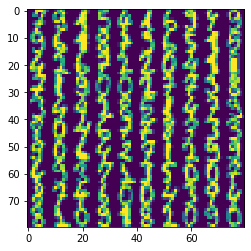

In [15]:
# 这道题我看不懂？？？
# YOUR CODE Starts here!
X1 = X[0:100,:].reshape((10,10,8,8)).transpose((1,2,0,3)).reshape((80,80)) # quick and dirty...
plt.imshow(X1)
plt.show()
# YOUR CODE ENDS here!

## 3 Analyze Dataset
For our dataset from day 2 we want to make some graphs and display the distrubutions. For that we want to use numpy. Therefore, take the existing solution from day 2, and change all list of numerical values (test score) to numpy arrays.
- the numpy function asarray() will be helpful!

In [16]:
def parse_csv(filename):
    with open("NewStudentPerformance.csv") as f:
        keys = f.readline()
        keys = keys.strip("\n").split(",")
        print(keys)
        
    #return resultsdict

data = parse_csv("NewStudentPerformance.csv")

['parental level of education', 'math score', 'reading score', 'python score', 'ids', 'race/ethnicity', 'test preparation course', 'gender', 'writing score', 'lunch']


### 3.1 BoxPlots
We want to find the distribution of test scores for different ethnic group, and display the result with boxplots.
- complete function `get_scores_for_ethnic_group(scoretype, data, ethnic_group)`, which returns all scores for a specified group. (`data` is the dictionary)
- Make 4 boxplot (as subplots) comparing the different score types for the different ethnic groups.
- Title each of the boxplot accordingly. 
- Label the boxes accordingly. 
- Titel the figure (using fig.subtitle) accordingly

In [ ]:
from collections import defaultdict

def get_scores_for_race(scoretype, data, race):
    # YOUR CODE Starts here!
    
    # YOUR CODE ENDS here!
    return scores

In [ ]:
# Please plot something

### 3.2 Bar Plot 
- complete the function `get_scores_for_gender(scoretype, data, 'gender')`
- Plot the different mean scores for male and female for each test in one bar plot. 
- color the genders differently

In [ ]:
def get_scores_for_gender(scoretype, data, gender):
    
    return scores

In [ ]:
# Get plottin

### 3.3 Histogram
For each test, plot a histogram of the scores for male and female for only those that have completed the test preparation course.
- complete the function get_scores_for_gender_prep(scoretype, data, gender)
- plot all histograms as subplots in one figure
- give proper titles and legends

In [ ]:
def get_scores_for_gender_prep(scoretype, data, gender):
     # YOUR CODE Starts here!
    
    # YOUR CODE ENDS here!
    return scores

In [ ]:
# here you may plot something

### 4.3 Scatter Plots and Line Plots
- Make a scatter plot comparing the reading scores to the writing scores for different parental education
- Color the different markers depending on parental education

In [ ]:
def get_scores_for_parental_education(scoretype, data, parental_education):
    # YOUR CODE Starts here!
    
    # YOUR CODE ENDS here!
    return scores

In [ ]:
# almost done, just one more plot

## 5 Advanced: Convert Dataset into numpy Array with one-hot-encoding:

We want to convert the dataset of our students into a numpy array. Since some values are not numerical, we need to "one-hot encode" these values. That means, for every categorial value of a categorial column, we add a new column, with the categorial value as header. In that new column, we write a 1, if the previous value is equal to the header name. Here is an example:

![](one-hot-encoding-example.png)

This in necessary, since most algorithms can not work with labeled/categeorial data. Therefore we simply add new column to our dataset, which tells us if a category is present or not. 

- read our dataset in _"NewStudentPerformance.csv"_ into a dictionary (we already have that)
- find the categorial features/column of our dataset.
- for each categorial feature/column, replace it with n-columns, where n is the number of categories.
- fill the new columns with 1 and 0, depending if the category is satisfied.
- your final data container should be a single numpy array
- you can also name each column based on structured arrays: https://docs.scipy.org/doc/numpy-1.13.0/user/basics.rec.html